In [18]:
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [19]:
datasets = ['InductiveFB15k237', 'InductiveWN18RR']
versions = ['v1','v2','v3','v4']
models = ['se','transe','rotate','transr']
split = 'test'
trained_model = 'train-test_extended'
datadir = '../data'
config_fname = '{}_hpo_extension_disjoint'
baseline_loc = os.path.join(datadir, 'baselines', 'FullyInductive.csv')

savedir = os.path.join(datadir,'figures')
savedir_tables = os.path.join(datadir, 'tables')

In [20]:
model_name_map = {'rotate':'RotatE', 'transe':'TransE', 'se':'SE', 'transr':'TransR'}
model_color_map = {'RotatE':'#FFCAB1', 'TransE':'#69A2B0', 'SE':'#659157', 'TransR':'#E05263', 'RuleN':'gray', 'DRUM':'#D6D6D6', 'Neural-LP':'#AEAE92', 'GraIL': '#4B402A'}

In [21]:
dfs = []
missing = []
for dataset in datasets:
    for version in versions:
        for model in models:
            floc_results = os.path.join(datadir, dataset, version, 'extension_results', 'hpo_best', split, model, config_fname.format(model))
            best_hpo_loc = os.path.join(datadir, dataset, version, 'models', 'train', model, 'ablation', config_fname.format(model), 'best_pipeline', 'pipeline_config.json')
            if os.path.exists(floc_results):
                files = glob.glob(floc_results + '/*.csv')
                latest_file = max(files, key=os.path.getctime)
                df = pd.read_csv(latest_file)
                df['dataset'] = dataset
                df['version'] = version
                df['model'] = model
                if os.path.exists(best_hpo_loc):
                    with open(best_hpo_loc, 'r') as f:
                        config = json.load(f)
                        df['alpha'] = config['extension']['alpha']
                        df['diffusion_iterations'] = config['extension']['diffusion_iterations']
                        df['embedding_dim'] = config['pipeline']['model_kwargs']['embedding_dim']
                        # df['num_negs_per_pos'] = config['pipeline']['negative_sampler_kwargs']['num_negs_per_pos']

                dfs.append(df)
            else:
                print(floc_results)
                missing.append({'dataset':dataset,
                                'version':version,
                                'model':model})
dfs = pd.concat(dfs, axis=0)
# cast to percentage
dfs[[c for c in dfs.columns if 'Value' in c]] *= 100
# rename models
dfs['model'] = dfs['model'].map(model_name_map)
dfs.head()


,Side,Type,Metric,Value_diffused,Value_iteration,Value_original,Value_eval,iteration_difference,orig_difference,eval_difference,iteration,dataset,version,model,alpha,diffusion_iterations,embedding_dim
0,head,optimistic,inverse_arithmetic_mean_rank,0.205222,0.171797,0.171797,100.0,0.000334,0.000334,-0.997948,1,InductiveFB15k237,v1,SE,0.112,4076,256
1,tail,optimistic,inverse_arithmetic_mean_rank,0.201696,0.169372,0.169372,100.0,0.000323,0.000323,-0.997983,1,InductiveFB15k237,v1,SE,0.112,4076,256
2,both,optimistic,inverse_arithmetic_mean_rank,0.203444,0.170576,0.170576,100.0,0.000329,0.000329,-0.997966,1,InductiveFB15k237,v1,SE,0.112,4076,256
3,head,realistic,inverse_arithmetic_mean_rank,0.205221,0.171797,0.171797,100.0,0.000334,0.000334,-0.997948,1,InductiveFB15k237,v1,SE,0.112,4076,256
4,tail,realistic,inverse_arithmetic_mean_rank,0.201696,0.169373,0.169373,100.0,0.000323,0.000323,-0.997983,1,InductiveFB15k237,v1,SE,0.112,4076,256


In [22]:
metric = 'hits_at_10'
side = 'both'
tp = 'realistic'

In [23]:
baselines = pd.read_csv(baseline_loc)
baselines = baselines[baselines['model'] != 'NBFNet']
baselines_long = baselines.melt(['dataset','model'], ['v1','v2','v3','v4'], var_name='version',value_name='H@10')
baselines_long

,dataset,model,version,H@10
0,InductiveWN18RR,Neural-LP,v1,74.4
1,InductiveWN18RR,DRUM,v1,74.4
2,InductiveWN18RR,RuleN,v1,80.9
3,InductiveWN18RR,GraIL,v1,82.5
4,InductiveFB15k237,Neural-LP,v1,52.9
5,InductiveFB15k237,DRUM,v1,52.9
6,InductiveFB15k237,RuleN,v1,49.8
7,InductiveFB15k237,GraIL,v1,64.2
8,InductiveWN18RR,Neural-LP,v2,68.9
9,InductiveWN18RR,DRUM,v2,68.9


In [24]:
msk = ( (dfs['Metric'] == metric) & \
        (dfs['Side'] == side) & \
        (dfs['Type'] == tp) )
dfs_metric = dfs[msk]
dfs_metric = dfs_metric.rename(columns={'Value_diffused':'H@10'})
dfs_metric['diffusion_diff']  = (dfs_metric['diffusion_iterations'] - dfs_metric['iteration']).abs()
dfs_metric = dfs_metric.sort_values(by='diffusion_diff')
dfs_metric.head()

,Side,Type,Metric,H@10,Value_iteration,Value_original,Value_eval,iteration_difference,orig_difference,eval_difference,iteration,dataset,version,model,alpha,diffusion_iterations,embedding_dim,diffusion_diff
9878,both,realistic,hits_at_10,54.255319,52.393617,0.797872,99.468085,0.018617,0.534574,-0.452128,242,InductiveWN18RR,v1,SE,1.000,240,4,2
8303,both,realistic,hits_at_10,12.809917,13.223140,0.165289,78.760331,-0.004132,0.126446,-0.659504,126,InductiveWN18RR,v3,TransR,0.112,123,32,3
8528,both,realistic,hits_at_10,24.734043,23.404255,1.063830,99.468085,0.013298,0.236702,-0.747340,138,InductiveWN18RR,v1,TransR,0.445,134,128,4
11903,both,realistic,hits_at_10,5.073478,4.968509,0.174948,24.562631,0.001050,0.048985,-0.194892,559,InductiveWN18RR,v4,TransR,0.223,555,128,4
8078,both,realistic,hits_at_10,13.223140,13.884298,0.165289,78.760331,-0.006612,0.130579,-0.655372,115,InductiveWN18RR,v3,TransR,0.112,123,32,8


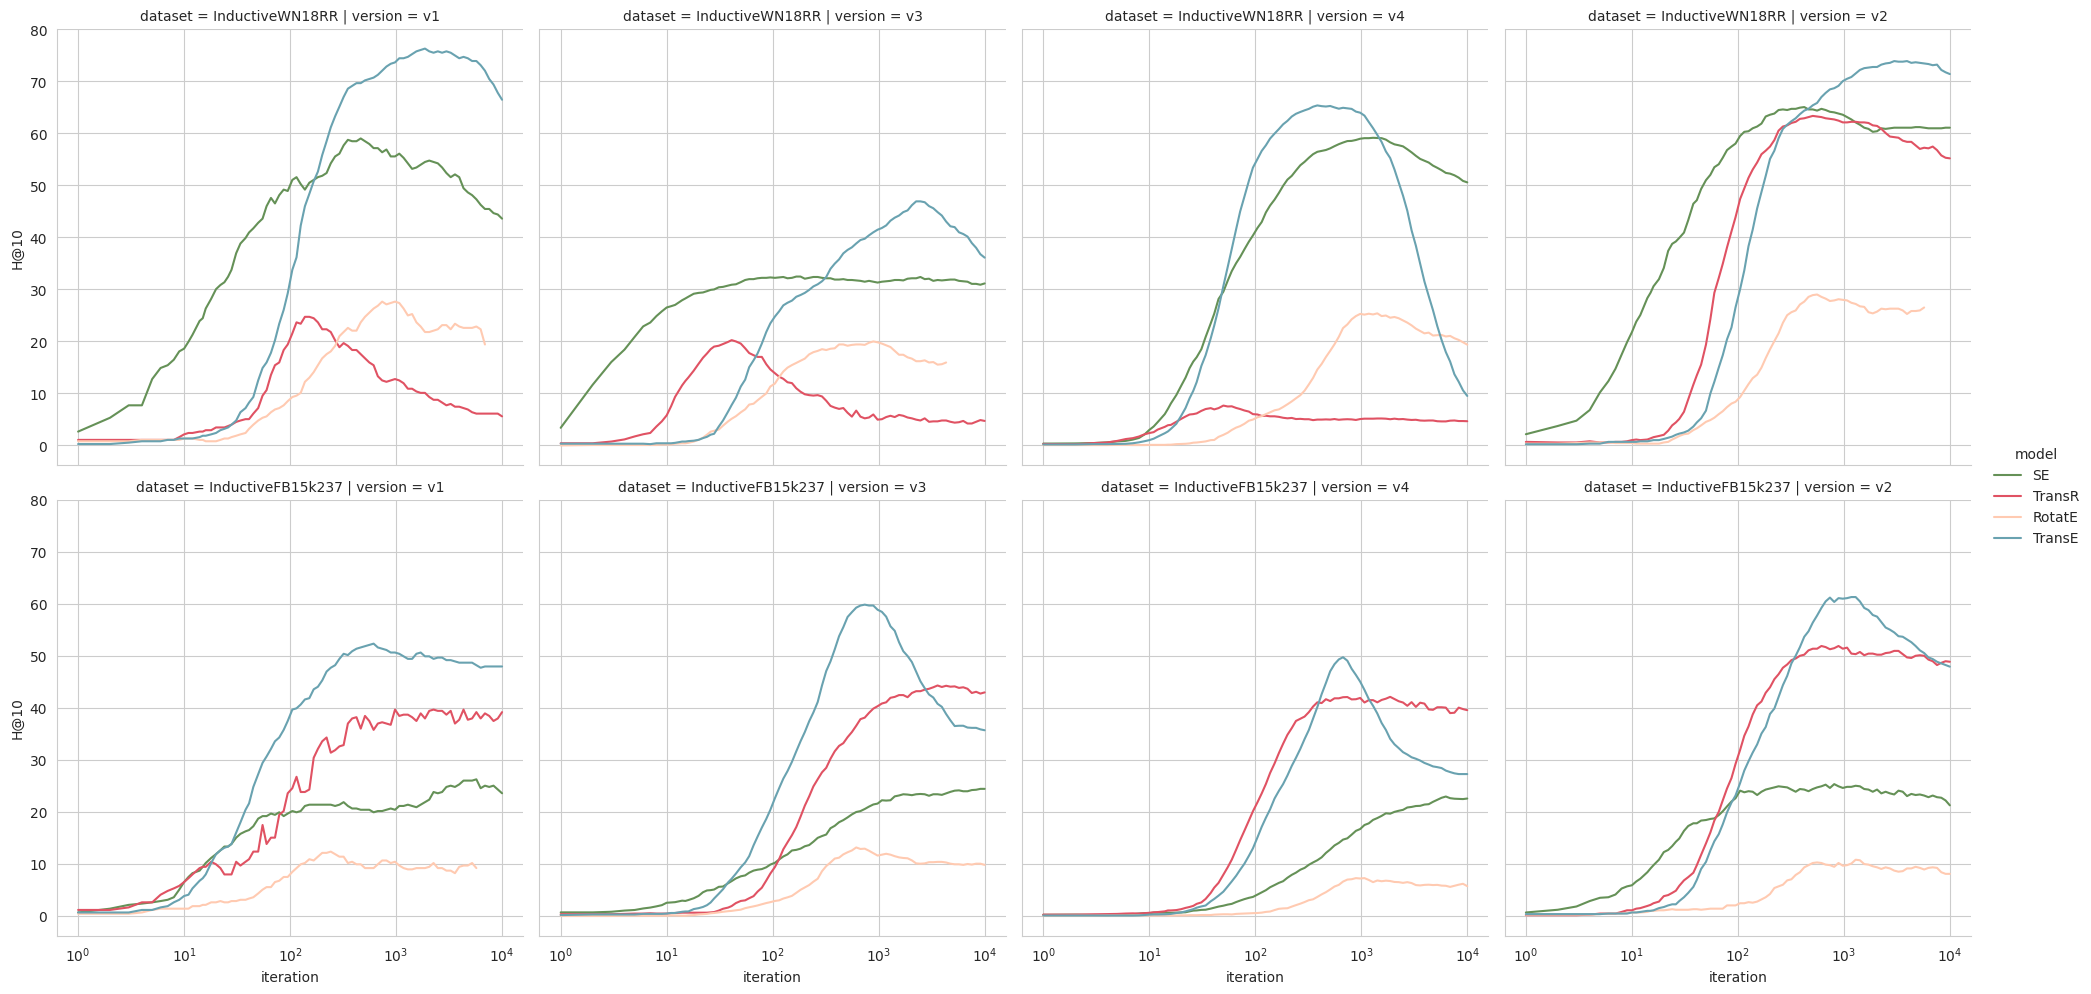

In [25]:
g = sns.relplot(
    data=dfs_metric,
    x="iteration", y="H@10",
    hue="model", col="version", row="dataset",
    kind="line", facet_kws=dict(sharex=True), palette=model_color_map,
)
g.set(xscale="log")

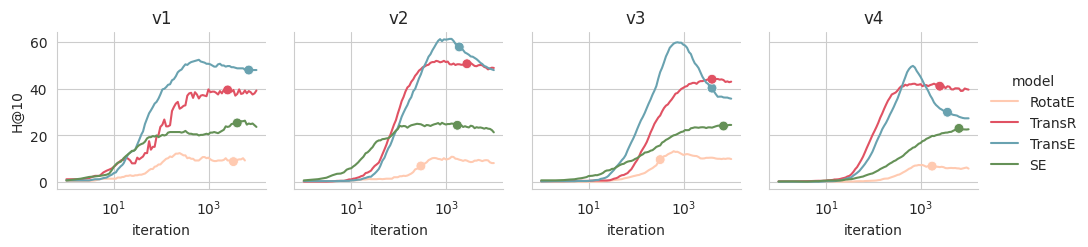

In [26]:
dset = 'InductiveFB15k237'
df_dset = dfs_metric[dfs_metric['dataset'] == dset].sort_values(by='version')
df_diff_point = df_dset.sort_values(by='diffusion_diff').groupby(['version','model']).head(1).reset_index()
g = sns.relplot(
    data=df_dset,
    x="iteration", y="H@10",
    hue="model", col="version",
    kind="line", facet_kws=dict(sharex=True), palette=model_color_map,
    height=2.5
)
g.set(xscale="log")
for ax in g.axes.flat:
    version = ax.get_title()[-2:]
    sns.scatterplot(ax=ax,data=df_diff_point[df_diff_point['version']==version],
                    x='iteration',y='H@10',hue='model',palette=model_color_map,legend=False,s=50)
for item, ax in g.axes_dict.items():
    ax.set_title(item) 

plt.savefig(os.path.join(savedir,f'diffusion_iterations_{dset}.pdf'))

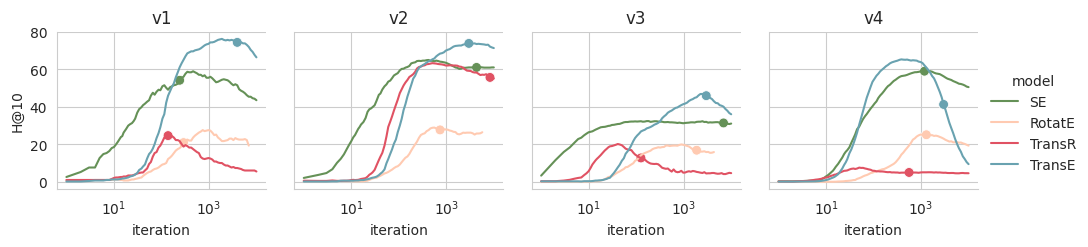

In [27]:
dset = 'InductiveWN18RR'
df_dset = dfs_metric[dfs_metric['dataset'] == dset].sort_values(by='version')
df_diff_point = df_dset.sort_values(by='diffusion_diff').groupby(['version','model']).head(1).reset_index()
g = sns.relplot(
    data=df_dset,
    x="iteration", y="H@10",
    hue="model", col="version",
    kind="line", facet_kws=dict(sharex=True), palette=model_color_map,
    height=2.5
)
g.set(xscale="log")
for ax in g.axes.flat:
    version = ax.get_title()[-2:]
    sns.scatterplot(ax=ax,data=df_diff_point[df_diff_point['version']==version],
                    x='iteration',y='H@10',hue='model',palette=model_color_map,legend=False,s=50)
for item, ax in g.axes_dict.items():
    ax.set_title(item)

plt.savefig(os.path.join(savedir,f'diffusion_iterations_{dset}.pdf'))

In [28]:
dfs_compare = (dfs_metric.groupby(['dataset','version','model'])
            .head(1)
            [['dataset','model','version','H@10','diffusion_diff']]
            # .apply(lambda x: (x['diffusion_iterations'] - x['iteration']).abs().sort_values().iloc[0])
            )
dfs_compare = pd.concat([dfs_compare, baselines_long]).sort_values(['dataset','version','H@10'])

dfs_compare_max = (dfs_metric.groupby(['dataset','version','model'])['H@10']
            .max()
            .to_frame()
            .reset_index()
            )
dfs_compare_max = pd.concat([dfs_compare_max, baselines_long]).sort_values(['dataset','version','H@10'])

dfs_compare_max

,dataset,version,model,H@10
0,InductiveFB15k237,v1,RotatE,12.439024
1,InductiveFB15k237,v1,SE,26.341463
3,InductiveFB15k237,v1,TransR,39.756098
6,InductiveFB15k237,v1,RuleN,49.800000
2,InductiveFB15k237,v1,TransE,52.439024
...,...,...,...,...
30,InductiveWN18RR,v4,TransE,65.395381
24,InductiveWN18RR,v4,Neural-LP,67.100000
25,InductiveWN18RR,v4,DRUM,67.100000
26,InductiveWN18RR,v4,RuleN,71.600000


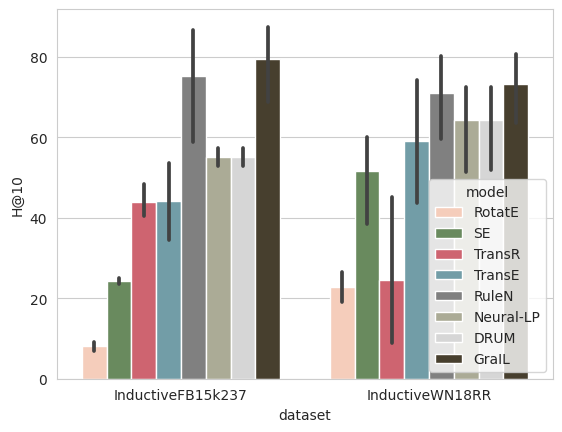

In [29]:
sns.barplot(data=dfs_compare, x="dataset", y="H@10", hue="model", palette=model_color_map)
plt.savefig(os.path.join(savedir,f'disjoint_dataset_overall_hpo_diff_iterations.pdf'))

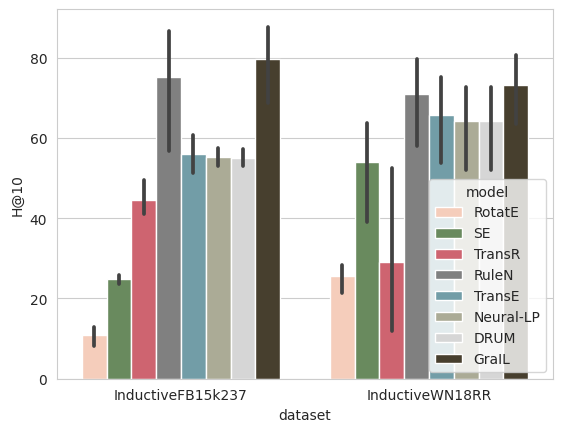

In [30]:
sns.barplot(data=dfs_compare_max, x="dataset", y="H@10", hue="model", palette=model_color_map)
plt.savefig(os.path.join(savedir,f'disjoint_dataset_overall_max_diff_iterations.pdf'))

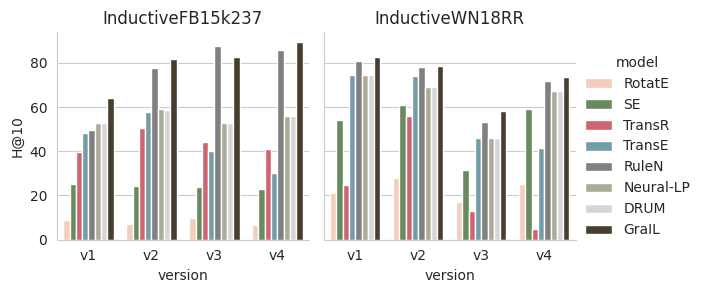

In [31]:
g = sns.catplot(
    x='version', 
    y='H@10', 
    data=dfs_compare, 
    kind='bar', 
    hue='model',
    palette=model_color_map,  # You can customize the color palette if you prefer
    col='dataset',   # This will create a subplot for each unique value in 'Category'
    col_wrap=2,       # Number of subplots per row
    height=3,         # Height of each subplot
    aspect=1        # Width ratio of each subplot
)
for item, ax in g.axes_dict.items():
    ax.set_title(item) 

plt.savefig(os.path.join(savedir,f'disjoint_hpo_diff_iterations.pdf'))

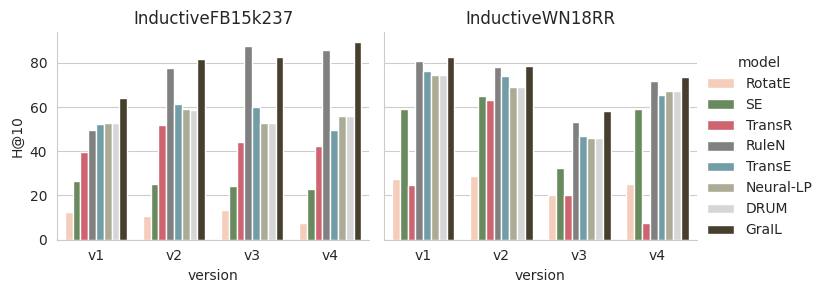

In [32]:
g = sns.catplot(
    x='version', 
    y='H@10', 
    data=dfs_compare_max, 
    kind='bar', 
    hue='model',
    palette=model_color_map,  # You can customize the color palette if you prefer
    col='dataset',   # This will create a subplot for each unique value in 'Category'
    col_wrap=2,       # Number of subplots per row
    height=3,         # Height of each subplot
    aspect=1.2        # Width ratio of each subplot
)
for item, ax in g.axes_dict.items():
    ax.set_title(item)  

plt.savefig(os.path.join(savedir,f'disjoint_max_diff_iterations.pdf'))

In [33]:
dset = 'InductiveFB15k237'
(dfs_compare[dfs_compare['dataset'] == dset]
            .pivot_table(index=['model'], columns=['version'], values=['H@10'])
            .to_csv(os.path.join(savedir_tables,f'{dset}_disjoint.csv')))
(dfs_compare_max[dfs_compare_max['dataset'] == dset]
            .pivot_table(index=['model'], columns=['version'], values=['H@10'])
            .to_csv(os.path.join(savedir_tables,f'{dset}_disjoint_max.csv')))

dset = 'InductiveWN18RR'
(dfs_compare[dfs_compare['dataset'] == dset]
            .pivot_table(index=['model'], columns=['version'], values=['H@10'])
            .to_csv(os.path.join(savedir_tables,f'{dset}_disjoint.csv')))
(dfs_compare_max[dfs_compare_max['dataset'] == dset]
            .pivot_table(index=['model'], columns=['version'], values=['H@10'])
            .to_csv(os.path.join(savedir_tables,f'{dset}_disjoint_max.csv')))

In [34]:
(dfs_metric.set_index(['dataset','version','model'])
            .sort_index()[['alpha','embedding_dim','diffusion_iterations']]
            .dropna(how='all')
            .drop_duplicates()
            .to_csv(os.path.join(savedir_tables, 'disjoint_inductive_hyperparameters.csv')))